<a href="https://colab.research.google.com/github/kenichi-maeda/cs666student/blob/main/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

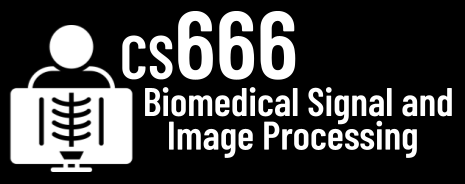

# Assignment 1

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


**Task 1** (5 pts): Install the BioSPPY library with the following code.

In [2]:
!pip install biosppy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.2/142.2 kB 3.7 MB/s eta 0:00:00


**Task 2** (10 pts): Download a sample ecg dataset from https://cs666.org/data/ecg.txt and upload it to this colab. The following code loads the dataset.

In [3]:
from biosppy import storage
signal, metadata = storage.load_txt('ecg.txt')

**Task 3** (10 pts): Figure out the sampling rate for this data and how many seconds it lasts.

In [4]:
SAMPLING_RATE = metadata['sampling_rate'] ### TODO!
SECONDS = len(signal)/SAMPLING_RATE ### TODO!

print(SAMPLING_RATE)
print(SECONDS)

1000.0
15.0


**Task 4** (15 pts): Process the signal with BioSPPY using the `ecg.ecg` method.

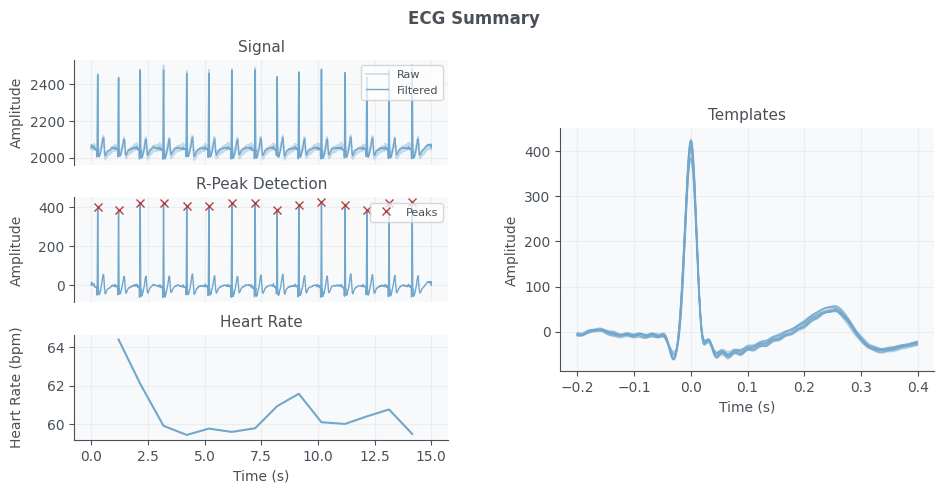

In [5]:
### TODO
from biosppy import signals
data = signals.ecg.ecg(signal, SAMPLING_RATE)

**Task 5** (10 pts): Plot the first 3 seconds of the unfiltered signal and then the filtered signal. Can you spot the P, Q, R, S, T waves?

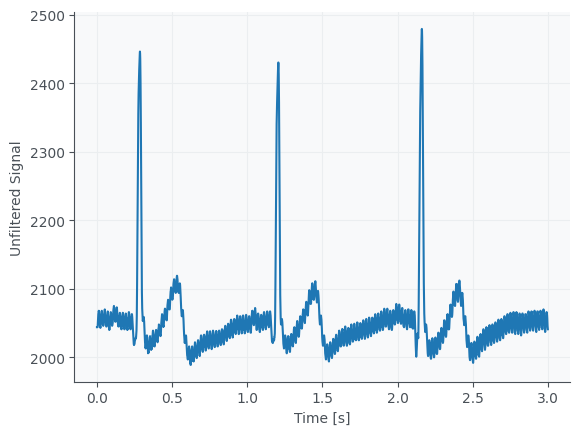

In [6]:
### TODO plot unfiltered signal
plt.plot(data['ts'][:3000], signal[:3000])
xlabel("Time [s]")
ylabel("Unfiltered Signal")
plt.show()

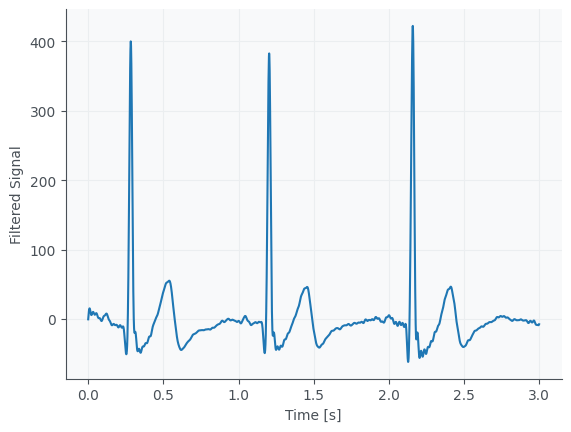

In [7]:
### TODO plot filtered signal
plt.plot(data['ts'][:3000], data['filtered'][:3000])
xlabel("Time [s]")
ylabel("Filtered Signal")
plt.show()

**Task 6** (15 pts): Please plot the whole filtered signal and mark the r-peaks with vertical lines based on the ecg.ecg output. You can use `plt.axvline(x = 100, color = 'r', ls=':')` to create a red, dashed vertical line at position 100. Please label the x-axis as 'time [s]'.

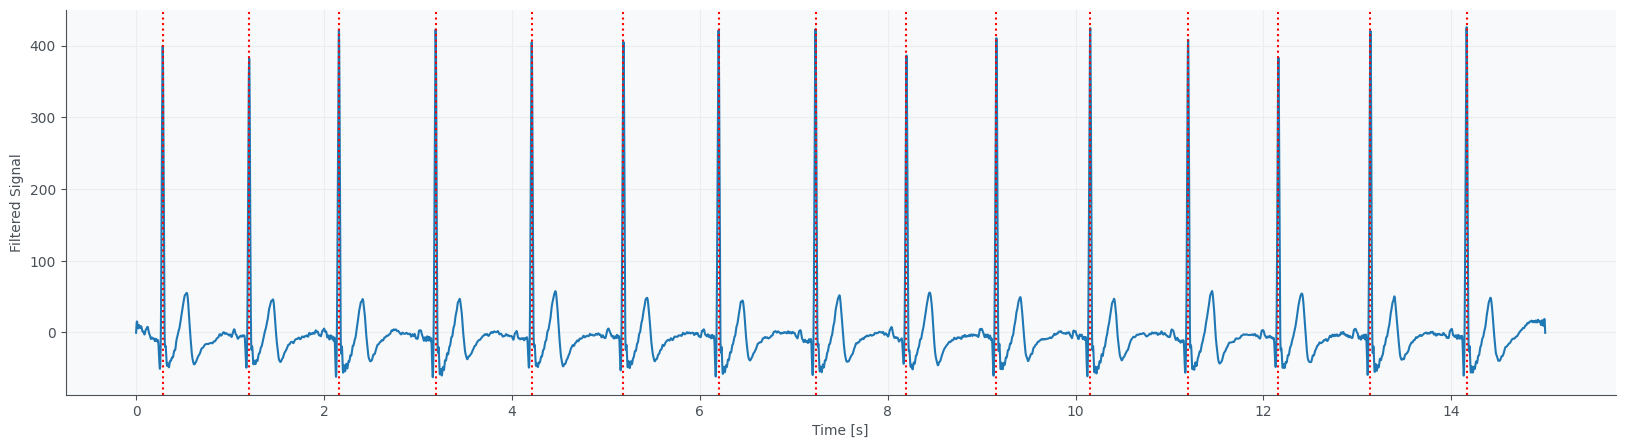

In [37]:
### TODO
plt.plot(data['ts'], data['filtered'])
PERIOD = 1 / SAMPLING_RATE

for rpeak in data['rpeaks']:
  plt.axvline(x=PERIOD*rpeak, color='r', ls=':')

xlabel("Time [s]")
ylabel("Filtered Signal")
plt.show()
rcParams['figure.figsize'] = [10, 5]

**Task 7** (5 pts): Let's install the NeuroKit2 library.

In [38]:
!pip install neurokit2
import neurokit2 as nk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 19.4 MB/s eta 0:00:00


**Task 8** (20 pts): Detect P Q S T Peaks using Neurokit.

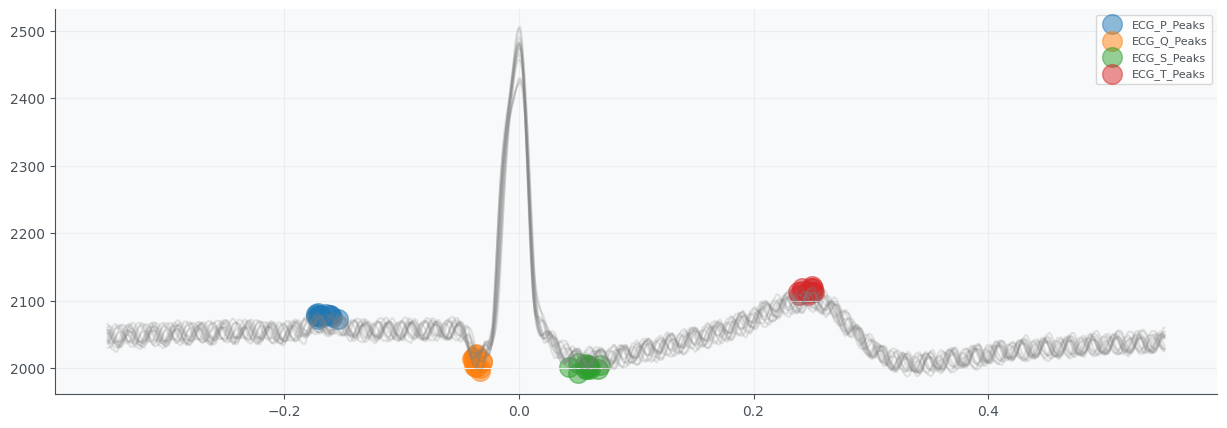

In [84]:
# We know the R spikes now but what about P Q S T waves?
# TODO Can you use nk.ecg_delineate to detect them in the unfiltred signal?
# Hint: Look at the tutorial: https://neuropsychology.github.io/NeuroKit/examples/ecg_delineate/ecg_delineate.html
# Hint 2: The plot will have blue, orange, green, and red circles :)
# Hint 3: rpeaks were detected above from biosppy's ecg.ecg method
import neurokit2 as nk

_, rpeaks = nk.ecg_peaks(signal, sampling_rate=1000)
_, waves_peak = nk.ecg_delineate(signal,
                                 rpeaks,
                                 sampling_rate=1000,
                                 method="peak",
                                 show=True,
                                 show_type='peaks')

In [85]:
# TODO Does the detection work well?
# Yes!

**Task 9** (10 pts): Use the sleepecg library to find the R Peaks.

In [86]:
# We have the R spikes/peaks now from Biosppy from above but there is another
# library called sleepecg.
# TODO Please install it and run the rpeak detection!
# Docs: https://sleepecg.readthedocs.io/en/stable/

!pip install sleepecg
from sleepecg import detect_heartbeats

In [87]:
sleepecg_rpeaks = detect_heartbeats(signal, SAMPLING_RATE)
print(sleepecg_rpeaks)

[  283  1203  2158  3188  4211  5188  6200  7232  8200  9157 10155 11198
 12159 13139 14162]


In [88]:
# TODO Do Biosppy and sleepecg give different rpeaks? Please calculate the MSE!
from sklearn.metrics import mean_squared_error

biosppy_rpeaks = data['rpeaks']

mse = mean_squared_error(biosppy_rpeaks, sleepecg_rpeaks)
print(mse)

0.2


**Bonus Task** (33 pts): Detect P Q S T Peaks for the full signal before and after filtering.

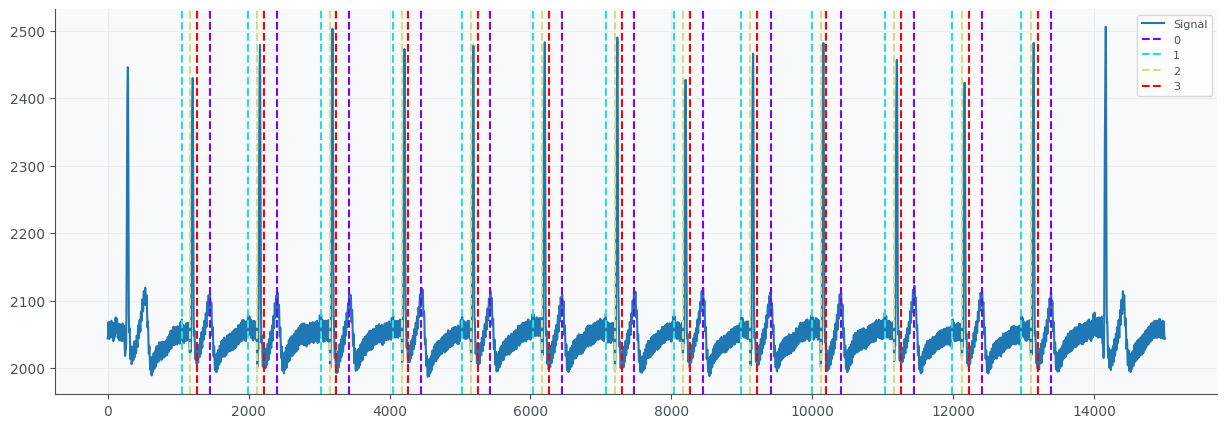

In [89]:
# TODO As above use the nk.ecg_delineate function to detect peaks for the whole signal
# Delineate the ECG signal
_, rpeaks = nk.ecg_peaks(signal, sampling_rate=1000)
_, waves_peak = nk.ecg_delineate(signal, rpeaks, sampling_rate=1000, method="peak")
plot = nk.events_plot([waves_peak['ECG_T_Peaks'],
                       waves_peak['ECG_P_Peaks'],
                       waves_peak['ECG_Q_Peaks'],
                       waves_peak['ECG_S_Peaks']], signal)
rcParams['figure.figsize'] = [15, 5]

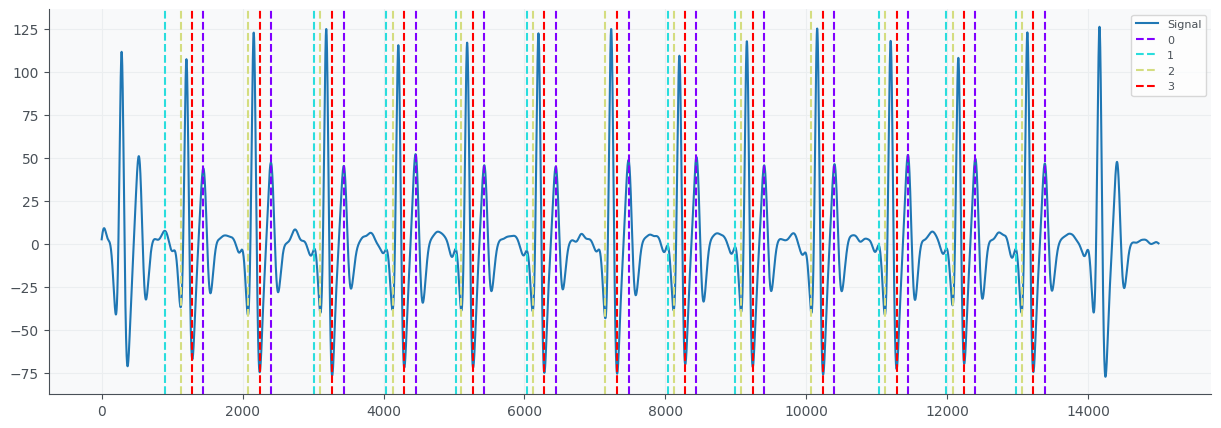

In [91]:
# TODO Let's filter the signal and see if the detection improves.
# Hint: You can use nk.signal_filter to define a bandpass.
# Hint 2: Which lowcut and highcut frequencies work well? Play with it :)
# Hint 3: You don't need to re-calculate the rpeaks since they are pretty accurate in general.

n_filtered_signals = nk.signal_filter(signal, highcut=8, lowcut=2)

_, rpeaks = nk.ecg_peaks(n_filtered_signals, sampling_rate=1000)
_, waves_peak = nk.ecg_delineate(n_filtered_signals, rpeaks, sampling_rate=1000, method="peak")
plot = nk.events_plot([waves_peak['ECG_T_Peaks'],
                       waves_peak['ECG_P_Peaks'],
                       waves_peak['ECG_Q_Peaks'],
                       waves_peak['ECG_S_Peaks']], n_filtered_signals)

rcParams['figure.figsize'] = [15, 5]

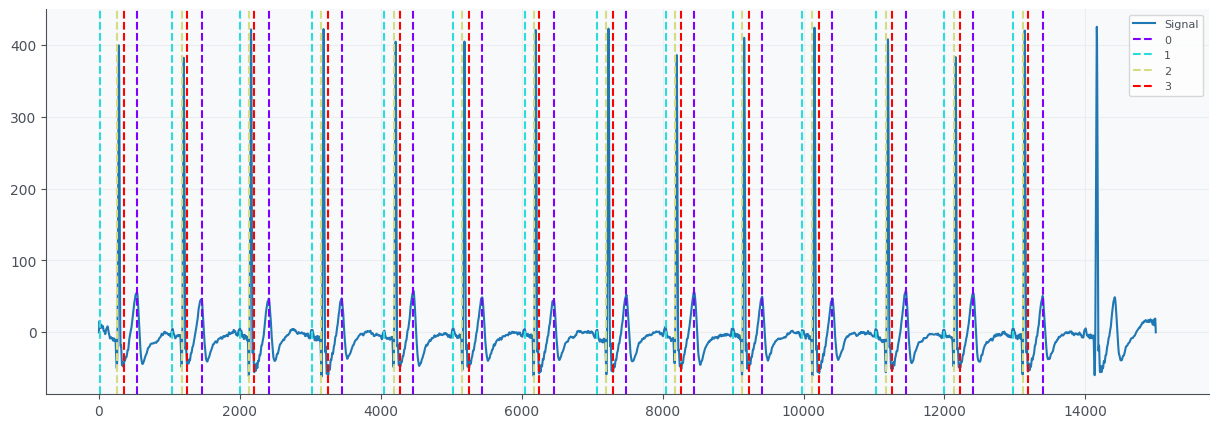

In [92]:
# Finally, run the delineation on the filtered signal from BioSPPY.

_, waves_peak = nk.ecg_delineate(data['filtered'], data['rpeaks'], sampling_rate=1000, method="peak")
plot = nk.events_plot([waves_peak['ECG_T_Peaks'],
                       waves_peak['ECG_P_Peaks'],
                       waves_peak['ECG_Q_Peaks'],
                       waves_peak['ECG_S_Peaks']], data['filtered'])

rcParams['figure.figsize'] = [15, 5]

In [93]:
# TODO Which one works the best?

# Running the delineation on the filtered signals from BioSSPY seems to work the best as it shows P, Q, R, and S peaks in all cases.

In [94]:
#
# Great job!!
#
#  , ; ,   .-'"""'-.   , ; ,
#  \\|/  .'         '.  \|//
#   \-;-/   ()   ()   \-;-/
#   // ;               ; \\
#  //__; :.         .; ;__\\
# `-----\'.'-.....-'.'/-----'
#        '.'.-.-,_.'.'
#jgs       '(  (..-'
#            '-'
#